<a href="https://colab.research.google.com/github/shashankbhagat/Regression-Algorithms/blob/master/SimpleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.svm import LinearSVR
%matplotlib inline

In [22]:
df=pd.read_csv('/content/sample_data/abc.csv')
print(df.head())
print(df.describe())

      X     Y
0  2.81  5.62
1  7.14  8.00
2  2.72  5.44
3  3.87  7.74
4  1.90  3.80
                X           Y
count  100.000000  100.000000
mean     4.573000    6.206800
std      2.788603    2.454116
min      0.000000    0.000000
25%      1.987500    3.975000
50%      4.375000    8.000000
75%      6.522500    8.000000
max     11.720000    8.000000


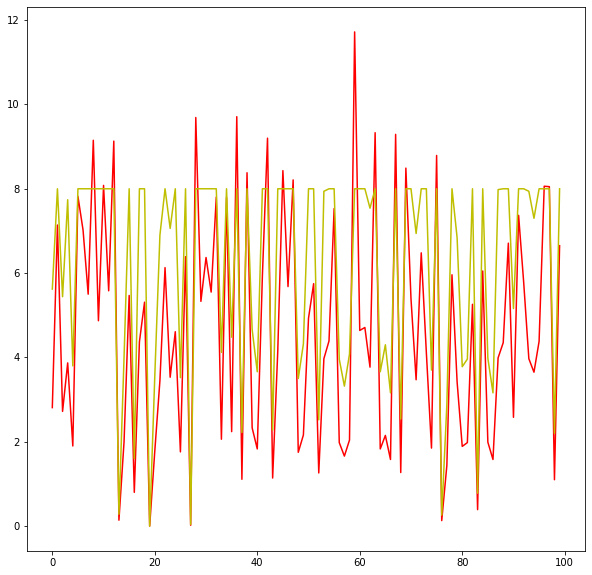

In [23]:
plt.figure(figsize=(10,10))
plt.plot(df['X'],c='r')
plt.plot(df['Y'],c='y')
plt.show()

# New Section

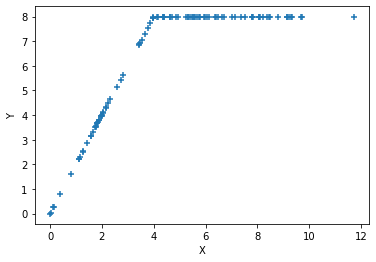

In [24]:
plt.scatter(df['X'],df['Y'],marker='+')
plt.xlabel('X')
plt.ylabel('Y')
plt.xscale('linear')
plt.yscale('linear')
plt.show()

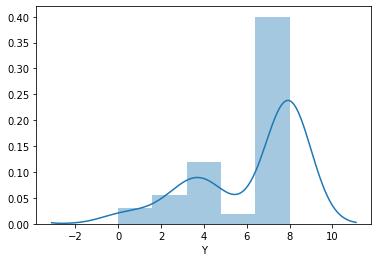

In [25]:
plt.tight_layout()
seabornInstance.distplot(df['Y'])

In [0]:
X=df.X.values.reshape(-1,1)
Y=df.Y.values.reshape(-1,1)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=0)

In [27]:
regression=LinearRegression()
regression.fit(X_train,Y_train) #train the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
# the intercept and slope calculated by the linear regression model
print(regression.intercept_)  #intercept
print(regression.coef_) #slope

[2.83302106]
[[0.71507608]]


In [0]:
Y_pred=regression.predict(X_test)

In [30]:
df_comparison=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted':Y_pred.flatten()})
df_comparison

,Actual,Predicted
0,8.00,7.402357
1,3.16,3.962841
2,5.44,4.778028
3,8.00,8.217544
4,8.00,9.118540
5,7.94,5.671873
6,1.60,3.405082
7,8.00,5.771984
8,8.00,5.972205
9,8.00,5.965054


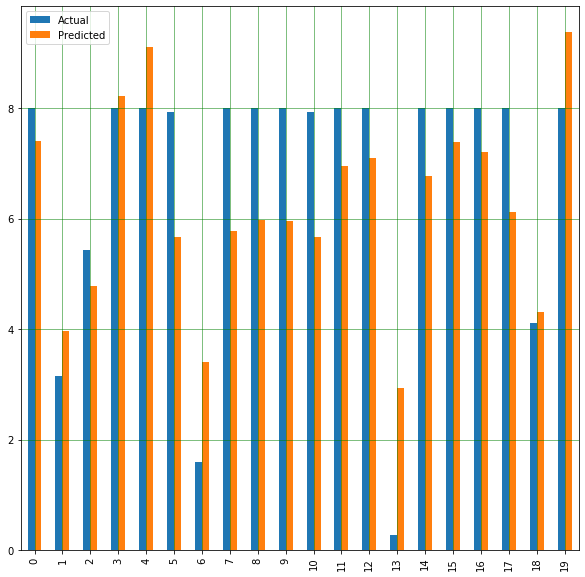

In [31]:
df_comparison.plot(kind='bar',figsize=(10,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

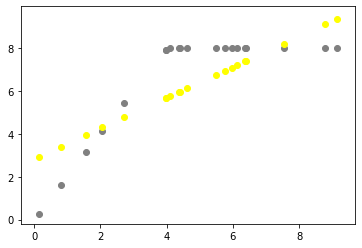

In [33]:
plt.scatter(X_test,Y_test,color='gray')
plt.scatter(X_test,Y_pred,c='yellow')
#plt.plot(X_test,Y_pred,color='red',linewidth=2)
plt.show()

In [21]:
#evaluation metrics for regression problem
print('Mean Absolute Error: ',metrics.mean_absolute_error(Y_test,Y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_pred))
print('Root MEan Squared Error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred)))

Mean Absolute Error:  1.3345985106779832
Mean Squared Error:  2.319124927555542
Root MEan Squared Error:  1.522867337477412


In [34]:
df.describe()

,X,Y
count,100.000000,100.000000
mean,4.573000,6.206800
std,2.788603,2.454116
min,0.000000,0.000000
25%,1.987500,3.975000
50%,4.375000,8.000000
75%,6.522500,8.000000
max,11.720000,8.000000


In [35]:
#compute the covariance between X and Y. 
#Also compute the covariance coefficient

covariance=np.dot((df['X']-df.describe()['X']['mean']),(df['Y']-df.describe()['Y']['mean']))/df.describe()['X']['count']
print('covariance: ',covariance)

covariance_coeff=covariance/np.dot(df.describe()['X']['std'],df.describe()['Y']['std'])
print('covariance coefficient: ',covariance_coeff)


covariance:  5.616515599999999
covariance coefficient:  0.8207016241419112


In [38]:
svrRegression=LinearSVR()
svrRegression.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [0]:
Y_pred_svr=svrRegression.predict(X_test)

In [40]:
df_comparison_svr=pd.DataFrame({'Actual':Y_test.flatten(),'Predicted:':Y_pred_svr.flatten()})
df_comparison_svr.head()

,Actual,Predicted:
0,8.00,7.265736
1,3.16,3.661849
2,5.44,4.515993
3,8.00,8.119880
4,8.00,9.063933


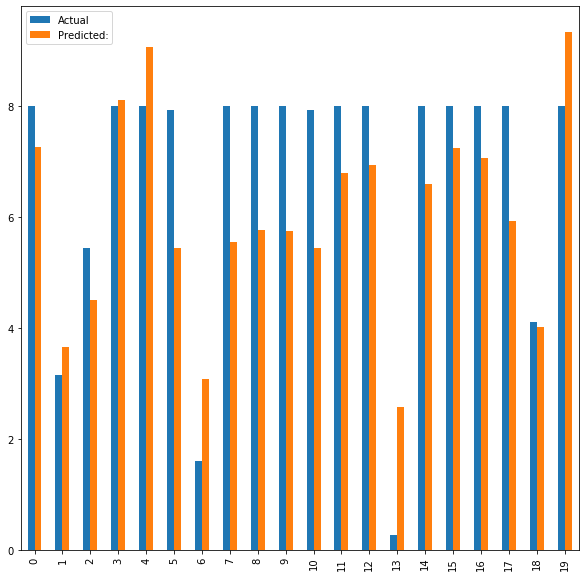

In [41]:
df_comparison_svr.plot(kind='bar',figsize=(10,10))
plt.show()

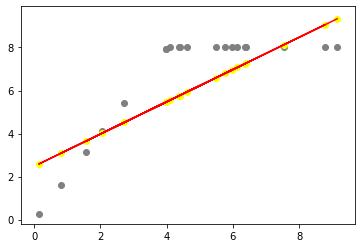

In [43]:
plt.scatter(X_test,Y_test,color='gray')
plt.scatter(X_test,Y_pred_svr,color='yellow')
plt.plot(X_test,Y_pred_svr,color='red')
plt.show()

In [44]:
# performance metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_true=Y_test,y_pred=Y_pred_svr))
print('Mean squared error: ',metrics.mean_squared_error(Y_test,Y_pred_svr))
print('Root mean squared error: ',np.sqrt(metrics.mean_squared_error(Y_test,Y_pred_svr)))

Mean Absolute Error:  1.392475636700249
Mean squared error:  2.5313846260245585
Root mean squared error:  1.5910325659849198


In [2]:
df2=pd.DataFrame({'X':[34.7,36,29.3,40.1,35.7,42.4,40.3,37.3,40.9,38.3,38.5,41.4,39.7,39.7,41.1,38,38.7],'Y':[1895,2030,1440,2835,3090,3827,3260,2690,3285,2920,3430,3657,3685,3345,3260,2680,2005]})
df2.head()

,X,Y
0,34.7,1895
1,36.0,2030
2,29.3,1440
3,40.1,2835
4,35.7,3090


In [10]:
df2.describe()

,X,Y
count,17.000000,17.000000
mean,38.358824,2902.000000
std,3.156552,696.763052
min,29.300000,1440.000000
25%,37.300000,2680.000000
50%,38.700000,3090.000000
75%,40.300000,3345.000000
max,42.400000,3827.000000


In [17]:
covariance=np.dot((df2['X']-df2.describe()['X']['mean']),(df2['Y']-df2.describe()['Y']['mean']))/df2.count()['X']
covariance

1692.2588235294115

In [18]:
covariance_coeff=covariance/np.dot(df2.describe()['X']['std'],df2.describe()['Y']['std'])
covariance_coeff

0.7694291951946035

In [15]:
np.sqrt(np.dot(df2.describe()['X']['std']**2,df2.describe()['Y']['std']**2)),np.dot(df2.describe()['X']['std'],df2.describe()['Y']['std'])

(2199.3691350656463, 2199.3691350656463)

In [20]:
np.sqrt(10),np.sqrt(485578.8)

(3.1622776601683795, 696.8348441345338)